1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import shap

2. Loading and prehandling the dataset

In [ ]:
#Load the dataset
dataset = pd.read_csv(r"C:\Users\47036\Desktop\BitterDB.csv")
dataset

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,...,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_unbrch_alkane,fr_urea,Partial_charge,Bitter recognition thresholds (mM)
0,11.151855,0.177547,-4.666667,0.507795,422.503,0.394347,-0.496743,0.496743,0.394347,1.344828,...,0,3,0,0,1,0,0,0,0.077507,0.00800
1,13.693205,0.052129,-1.284164,0.318972,414.586,0.184001,-0.510771,0.510771,0.184001,0.900000,...,0,0,0,0,0,0,0,0,-0.062337,0.03500
2,12.859726,0.011843,-2.239789,0.464702,362.466,0.209299,-0.508269,0.508269,0.209299,1.076923,...,0,0,0,0,0,0,0,0,-0.062337,0.02100
3,11.151855,0.000000,-0.503545,0.846143,360.885,0.119124,-0.496743,0.496743,0.119124,1.400000,...,0,3,0,0,1,0,0,0,0.077507,0.03000
4,12.962440,0.048619,-0.931089,0.391475,496.644,0.309200,-0.460856,0.460856,0.309200,0.888889,...,0,0,0,0,0,0,0,0,-0.051508,0.00013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,12.003899,0.035986,-1.696664,0.168798,852.072,0.186879,-0.393566,0.393566,0.186879,0.683333,...,0,1,0,0,0,0,0,0,-0.061285,0.01800
168,11.809736,0.103910,-1.993366,0.093707,1034.200,0.187151,-0.393567,0.393567,0.187151,0.541667,...,0,1,0,0,0,0,0,0,-0.061291,0.01900
169,10.272994,0.079220,-0.079220,0.533547,397.647,0.057740,-0.392797,0.392797,0.057740,1.000000,...,0,1,0,0,0,0,0,0,-0.061285,0.16000
170,12.444120,0.014769,-0.072917,0.495409,185.267,0.112300,-0.632335,0.632335,0.112300,1.153846,...,0,2,0,0,0,1,0,0,-0.042277,0.47000


In [ ]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 138 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    MaxAbsEStateIndex                   float64
 1    MinAbsEStateIndex                   float64
 2    MinEStateIndex                      float64
 3    qed                                 float64
 4    MolWt                               float64
 5    MaxPartialCharge                    float64
 6    MinPartialCharge                    float64
 7    MaxAbsPartialCharge                 float64
 8    MinAbsPartialCharge                 float64
 9    FpDensityMorgan1                    float64
 10   FpDensityMorgan2                    float64
 11   FpDensityMorgan3                    float64
 12   BCUT2D_MWHI                         float64
 13   BCUT2D_MWLOW                        float64
 14   BCUT2D_CHGHI                        float64
 15   BCUT2D_CHGLO                        fl

In [ ]:
# Display columns with null values and their counts
null_values = dataset.isnull().sum()
null_columns = null_values[null_values > 0]
print("Columns with null values and their counts:\n", null_columns)

Columns with null values and their counts:
 Series([], dtype: int64)


In [ ]:
dataset.describe()

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,...,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_unbrch_alkane,fr_urea,Partial_charge,Bitter recognition thresholds (mM)
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,11.741886,0.151162,-0.984742,0.471228,373.515564,0.237700,-0.447276,0.447577,0.237456,1.099513,...,0.058140,0.168605,0.168605,0.017442,0.023256,0.005814,0.040698,0.005814,-0.031899,4.113596
std,1.935947,0.238906,0.865954,0.215340,230.626063,0.074015,0.075093,0.074551,0.073517,0.281480,...,0.258409,0.640315,0.375496,0.170099,0.151155,0.076249,0.395258,0.076249,0.049299,14.359193
min,2.869324,0.000000,-4.666667,0.041146,60.056000,-0.004891,-0.632335,0.159176,0.004891,0.365079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.102549,0.000018
25%,11.145704,0.027762,-1.639413,0.335884,207.217000,0.187086,-0.507966,0.393429,0.187086,0.909091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.060302,0.020375
50%,12.007085,0.076832,-0.930822,0.503400,332.442000,0.233972,-0.480903,0.480903,0.233972,1.137931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.044201,0.111000
75%,12.852002,0.185022,-0.395762,0.634994,415.079000,0.310297,-0.393429,0.507966,0.309203,1.259259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.030523,0.723750
max,14.899210,1.694444,1.694444,0.880729,1129.162000,0.394347,-0.159176,0.632335,0.394347,1.888889,...,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,5.000000,1.000000,0.309056,85.000000


3. Data Visulazation

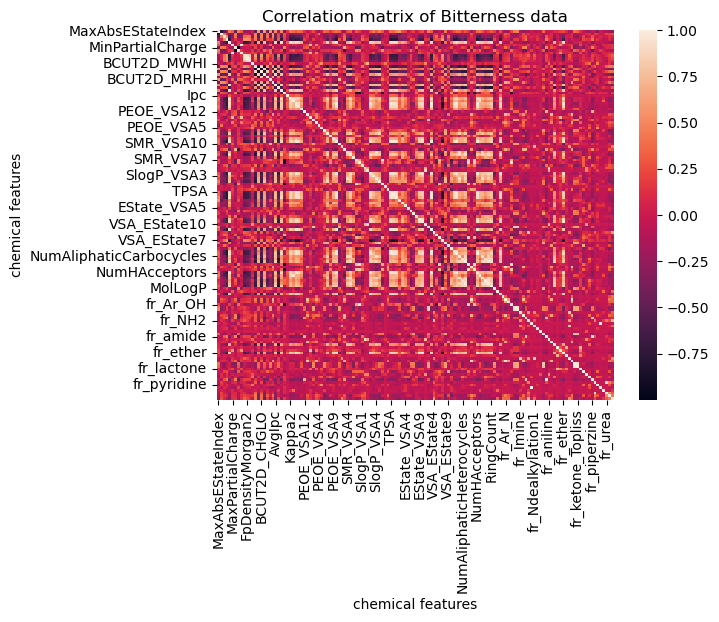

In [ ]:
# Plot correlation matrix for the filtered dataset
correlation_mat = dataset.corr()

sns.heatmap(correlation_mat, annot = False)
plt.title("Correlation matrix of Bitterness data")
plt.xlabel("chemical features")
plt.ylabel("chemical features")
plt.show( )

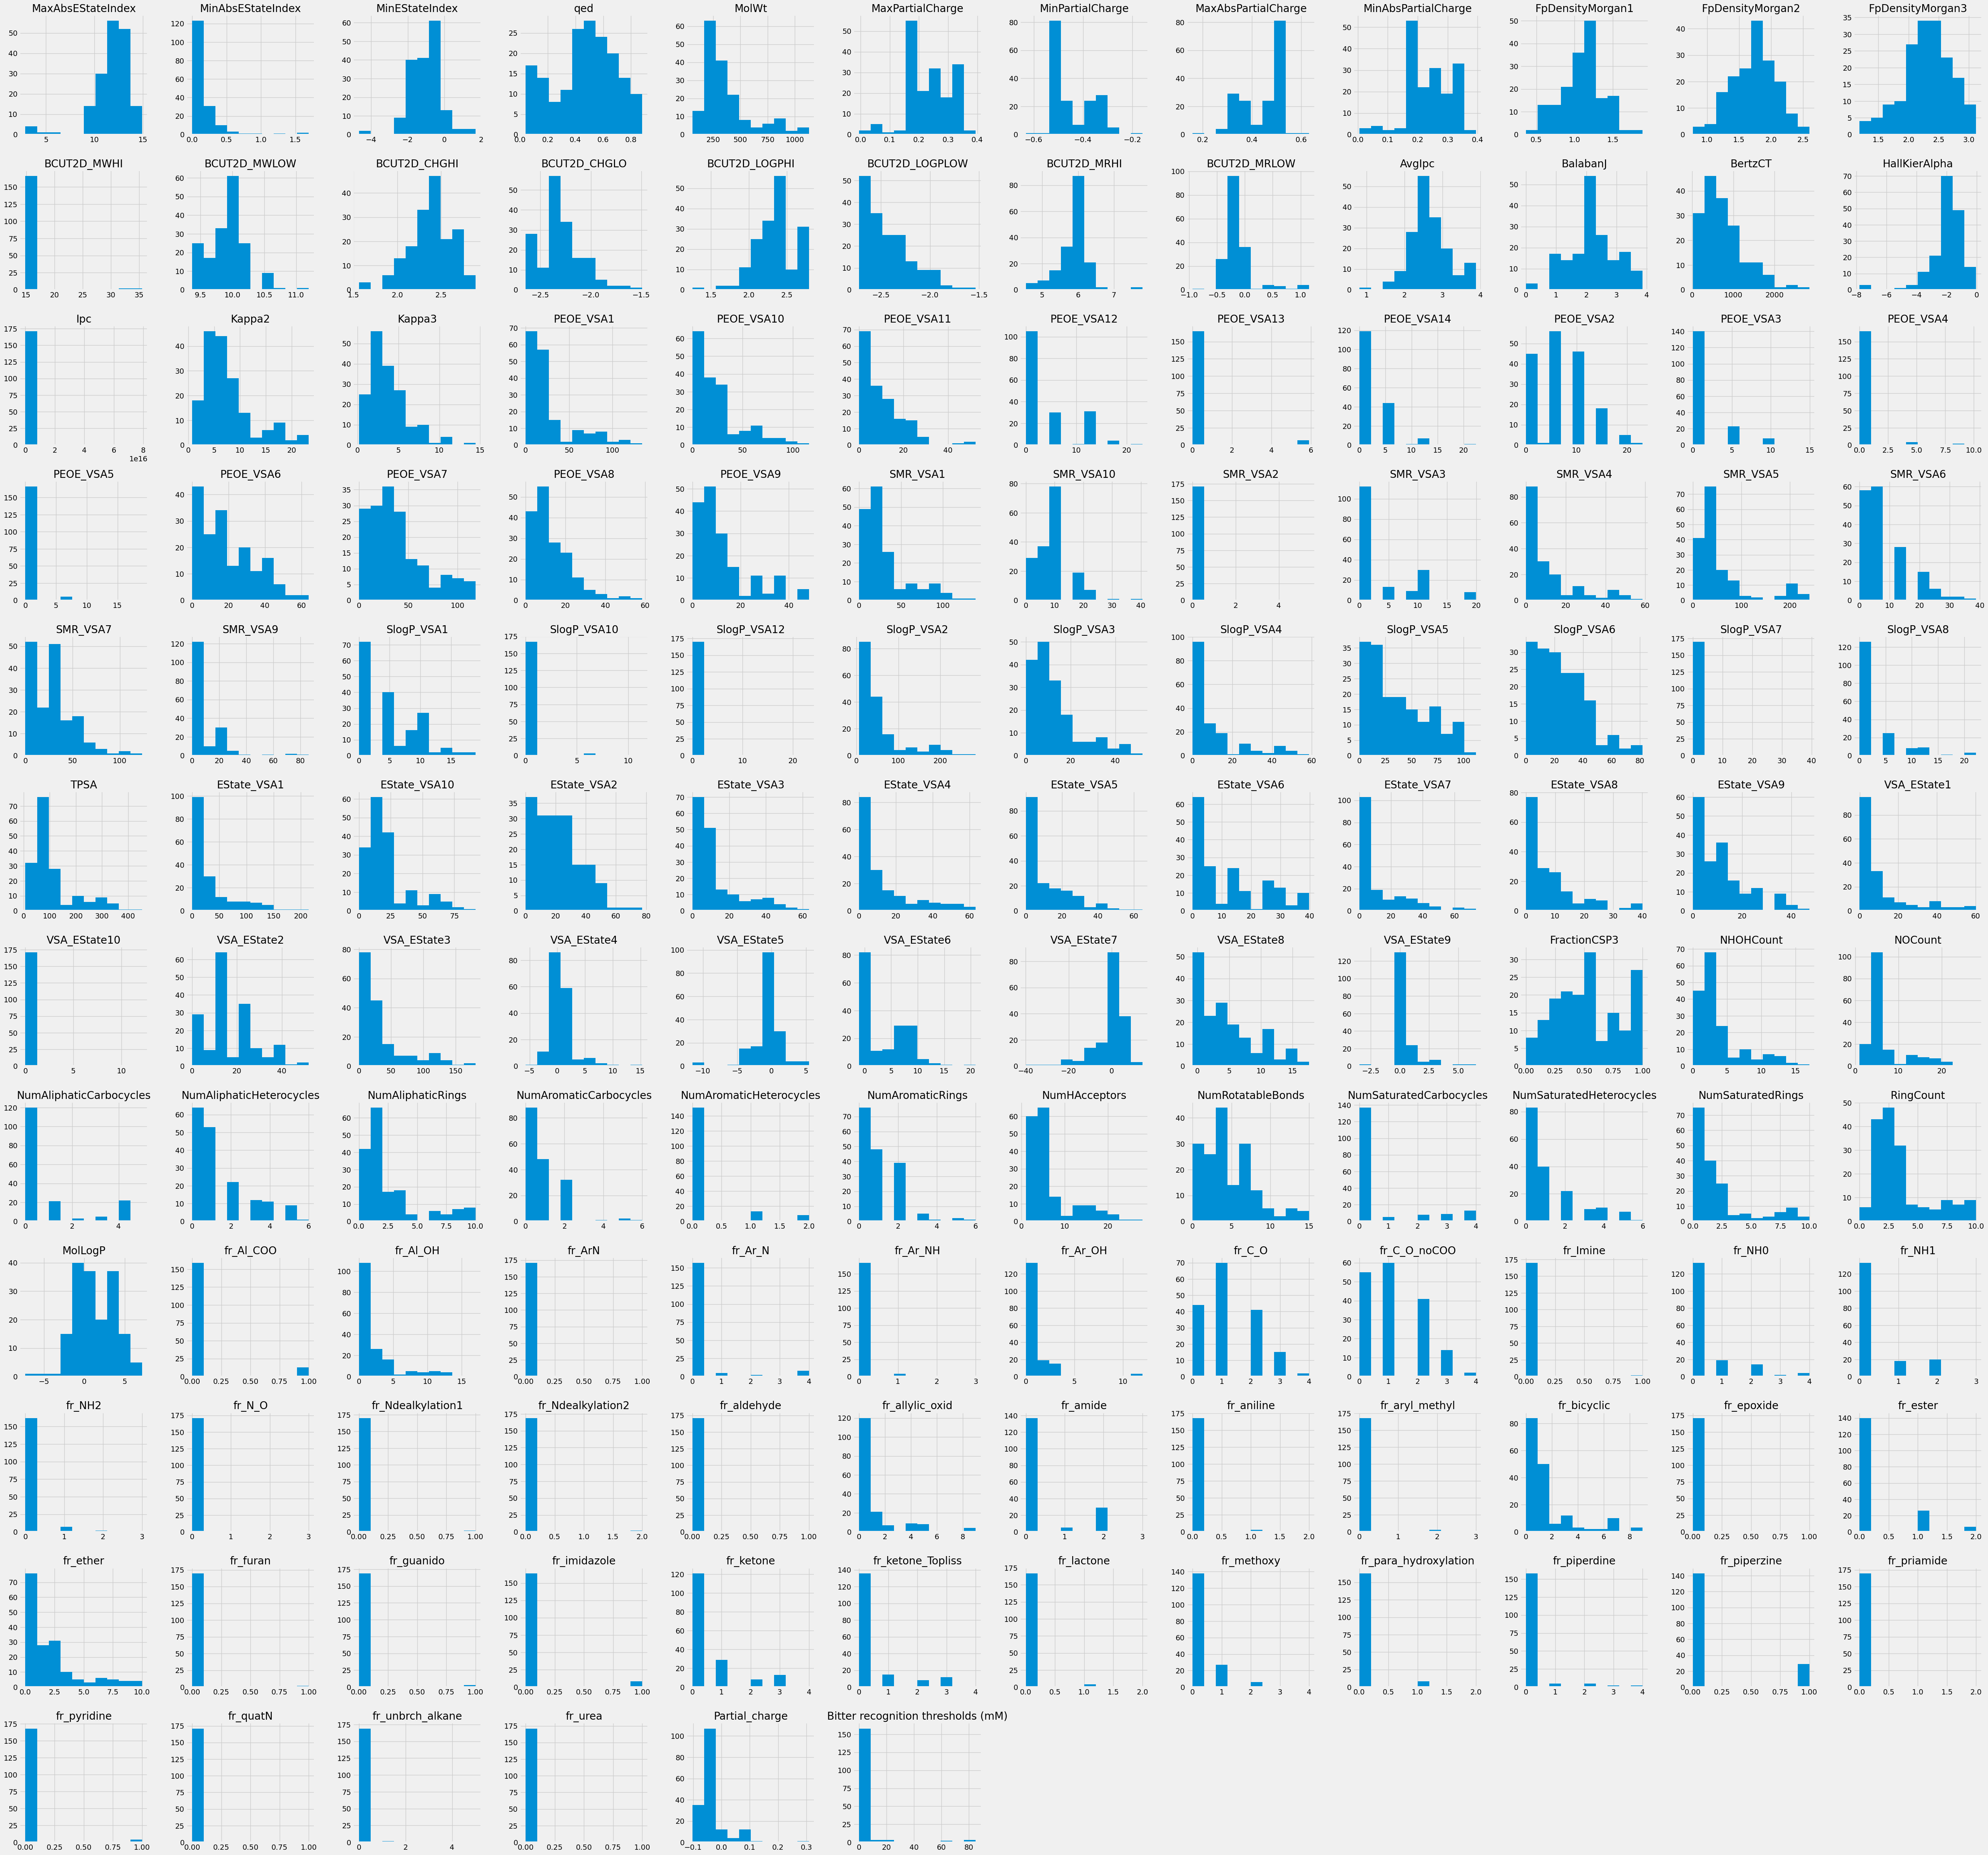

In [ ]:
dataset.hist(bins = 10, figsize = (60,60))
plt.show()

4.Linear Regression Model Training and Evaluation

In [ ]:
# Split data into features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,...,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_unbrch_alkane,fr_urea,Partial_charge
0,11.151855,0.177547,-4.666667,0.507795,422.503,0.394347,-0.496743,0.496743,0.394347,1.344828,...,1,0,3,0,0,1,0,0,0,0.077507
1,13.693205,0.052129,-1.284164,0.318972,414.586,0.184001,-0.510771,0.510771,0.184001,0.900000,...,0,0,0,0,0,0,0,0,0,-0.062337
2,12.859726,0.011843,-2.239789,0.464702,362.466,0.209299,-0.508269,0.508269,0.209299,1.076923,...,0,0,0,0,0,0,0,0,0,-0.062337
3,11.151855,0.000000,-0.503545,0.846143,360.885,0.119124,-0.496743,0.496743,0.119124,1.400000,...,1,0,3,0,0,1,0,0,0,0.077507
4,12.962440,0.048619,-0.931089,0.391475,496.644,0.309200,-0.460856,0.460856,0.309200,0.888889,...,0,0,0,0,0,0,0,0,0,-0.051508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,12.003899,0.035986,-1.696664,0.168798,852.072,0.186879,-0.393566,0.393566,0.186879,0.683333,...,0,0,1,0,0,0,0,0,0,-0.061285
168,11.809736,0.103910,-1.993366,0.093707,1034.200,0.187151,-0.393567,0.393567,0.187151,0.541667,...,0,0,1,0,0,0,0,0,0,-0.061291
169,10.272994,0.079220,-0.079220,0.533547,397.647,0.057740,-0.392797,0.392797,0.057740,1.000000,...,0,0,1,0,0,0,0,0,0,-0.061285
170,12.444120,0.014769,-0.072917,0.495409,185.267,0.112300,-0.632335,0.632335,0.112300,1.153846,...,0,0,2,0,0,0,1,0,0,-0.042277


In [ ]:
y

0      0.00800
1      0.03500
2      0.02100
3      0.03000
4      0.00013
        ...   
167    0.01800
168    0.01900
169    0.16000
170    0.47000
171    0.11000
Name: Bitter recognition thresholds (mM), Length: 172, dtype: float64

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137, 137)
(35, 137)
(137,)
(35,)


In [ ]:
# Linear Regression model building
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Linear Regression Model Evaluation
y_pred = regressor.predict(X_test)

print('Test Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score:', regressor.score(X_test, y_test))


Test Metrics:
MAE: 7.0558044968123355
MSE: 119.89902916595148
RMSE: 10.949841513280065
Variance score: 0.695946014721026


In [ ]:
# Training error metrics
train_pred = regressor.predict(X_train)
print('Train Metrics:')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('Variance score:', regressor.score(X_train, y_train))

Train Metrics:
MAE: 5.151996282292286
MSE: 142.8092738288129
RMSE: 11.950283420438735
Variance score: 0.07213864681755977


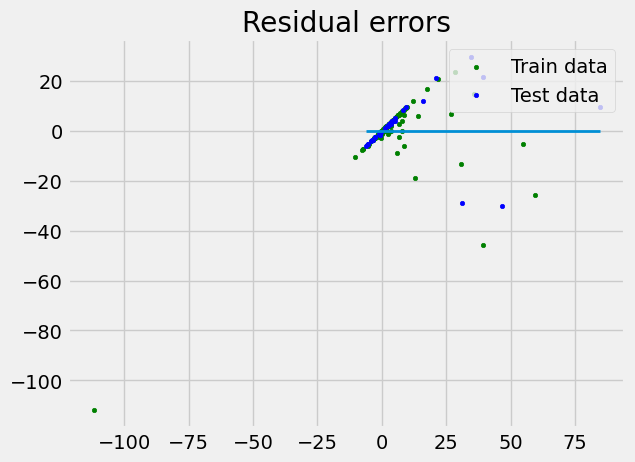

In [ ]:
# Residual errors plot
plt.style.use('fivethirtyeight')
plt.scatter(train_pred, train_pred - y_train, color="green", s=10, label='Train data')
plt.scatter(y_pred, y_pred - y_test, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()

5.XGBoost Model Training and Evaluation

In [ ]:
# XGBoost model training
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=48, max_depth=2, subsample=0.9, eta=1)
xgb_model.fit(X_train, y_train)

# XGBoost Test Set Evaluation
xgb_pred_test = xgb_model.predict(X_test)
print('XGBoost Test Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test)))
print('Variance score:', xgb_model.score(X_test, y_test))

XGBoost Test Metrics:
MAE: 3.1532868229341506
MSE: 95.64119248920895
RMSE: 9.779631510911285
Variance score: 0.7574618749170363


In [ ]:
# XGBoost Training Set Evaluation
xgb_pred_train = xgb_model.predict(X_train)
print('XGBoost Train Metrics:')
print('MAE:', metrics.mean_absolute_error(y_train, xgb_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, xgb_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, xgb_pred_train)))
print('Variance score:', xgb_model.score(X_train, y_train))


XGBoost Train Metrics:
MAE: 0.18724391683584687
MSE: 0.49601300877976784
RMSE: 0.7042819100188275
Variance score: 0.9967773010170602


6.XGBoost SHAP analysis for Feature Importance Ranking

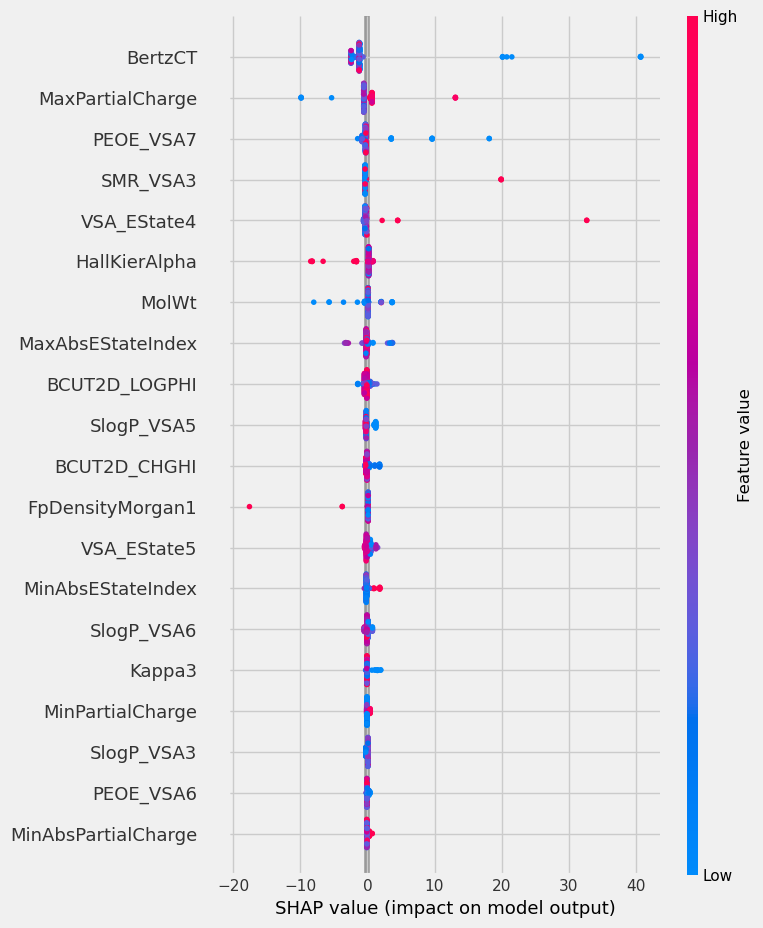

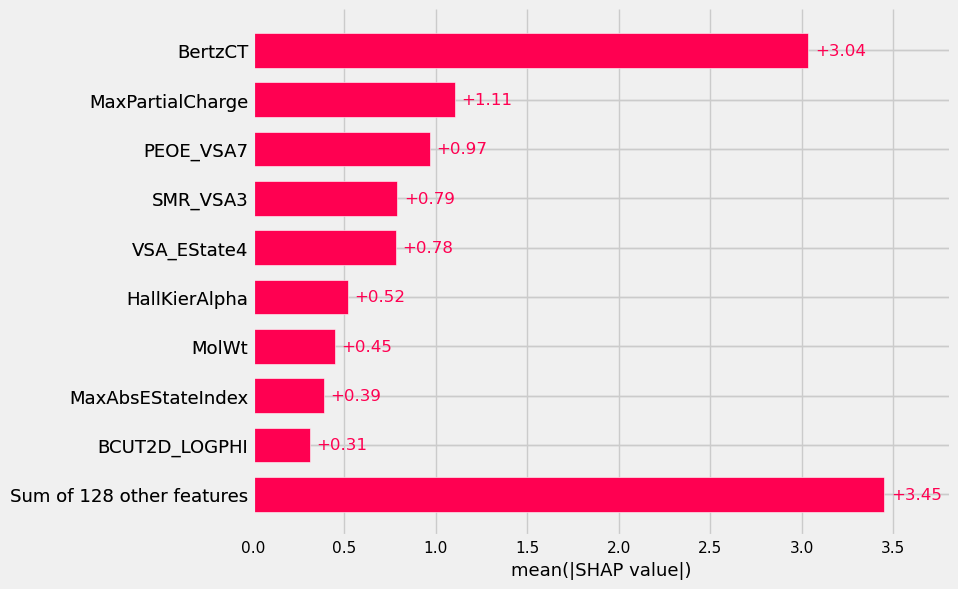

In [ ]:
# SHAP analysis for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)
shap.plots.bar(shap_values)


7. Feature Importance Ranking with RandomForest And SelectKBest

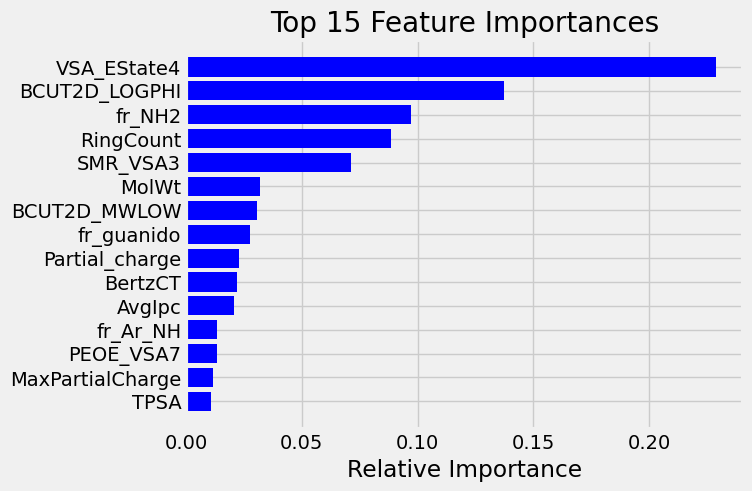

In [ ]:
# Feature Importance Ranking with RandomForest
rf_model = RandomForestRegressor(random_state=1, max_depth=10)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
top_indices = np.argsort(importances)[-15:]
plt.title('Top 15 Feature Importances')
plt.barh(range(len(top_indices)), importances[top_indices], color='b', align='center')
plt.yticks(range(len(top_indices)), [X.columns[i] for i in top_indices])
plt.xlabel('Relative Importance')
plt.show()

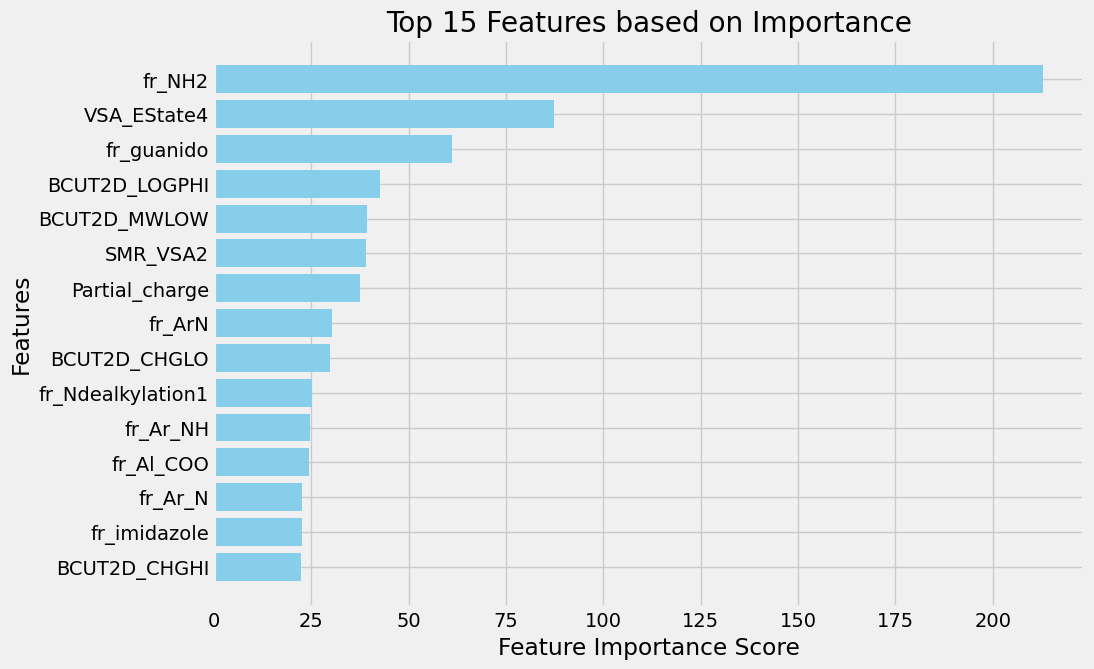

In [ ]:
# Feature Importance Ranking with SelectKBest
selector = SelectKBest(f_regression, k='all')  # 'all' will ensure all features are considered
selector.fit(X, y)

# Get the scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for easy sorting and ranking
features_df = pd.DataFrame({'feature': features, 'score': scores})

# Sort and rank the features based on scores
features_df = features_df.sort_values(by='score', ascending=False)
features_df['rank'] = range(1, len(features_df) + 1)

# Select the top 15 features
top_15 = features_df.head(15)

# Plotting the top 15 features
plt.figure(figsize=(10, 7))
plt.barh(top_15['feature'], top_15['score'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Features based on Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()